In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data
this has more cols and rows.

In [2]:
df = pd.read_csv("hypothyroid.csv")
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [3]:
df.replace("?", np.NaN, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [5]:
df.drop("TBG", axis=1, inplace=True)
df.shape

(3772, 29)

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


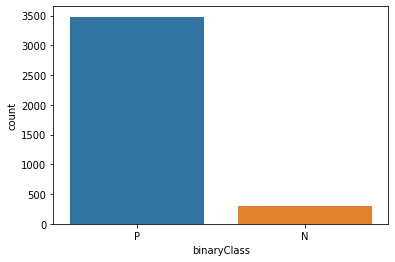

In [9]:
sns.countplot(df.binaryClass);

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sick', ylabel='count'>

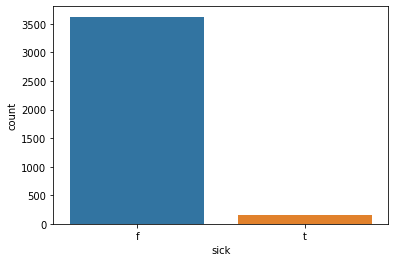

In [10]:
sns.countplot(df.sick)

In [92]:
df.age = pd.to_numeric(df.age,)

In [83]:
pd.crosstab(df.goitre, df.binaryClass)

binaryClass,N,P
goitre,,
f,291,3447
t,0,34


In [44]:
df = pd.DataFrame({"County":["Autauga", "Baldwin", "Barbour", "Bibb","Blount"],
        "LandArea": [599, 1578, 891, 625, 639], 
        "NatAmenity":[4, 4, 4, 3, 4],
        "College1970":[0.64, 0.65, 0.73, 0.042, 0.027], 
        "College1980":[0.121, 0.121, 0.092, 0.049, 0.053],
        "College1990":[0.145, 0.168, 0.118, 0.047, .070],
        "College2000":[0.180, 0.231, 0.109, 0.071, 0.096],
        "Jobs1970":[6853, 19749, 9448, 3965, 7587],
        "Jobs1980":[11278, 27861, 9755, 4276, 9490],
        "Jobs1990":[11471, 40809, 12163, 5564, 11811],
        "Jobs2000":[16289, 70247, 15192, 6094, 16507]})
df

,County,LandArea,NatAmenity,College1970,College1980,College1990,College2000,Jobs1970,Jobs1980,Jobs1990,Jobs2000
0,Autauga,599,4,0.640,0.121,0.145,0.180,6853,11278,11471,16289
1,Baldwin,1578,4,0.650,0.121,0.168,0.231,19749,27861,40809,70247
2,Barbour,891,4,0.730,0.092,0.118,0.109,9448,9755,12163,15192
3,Bibb,625,3,0.042,0.049,0.047,0.071,3965,4276,5564,6094
4,Blount,639,4,0.027,0.053,0.070,0.096,7587,9490,11811,16507


In [45]:
df.groupby(["College1970", "College1980"]).size()

College1970  College1980
0.027        0.053          1
0.042        0.049          1
0.640        0.121          1
0.650        0.121          1
0.730        0.092          1
dtype: int64

In [39]:
df.iloc[:,2:].columns.tolist()

['NatAmenity',
 'College1970',
 'College1980',
 'College1990',
 'College2000',
 'Jobs1970',
 'Jobs1980',
 'Jobs1990',
 'Jobs2000']

In [51]:
pd.wide_to_long(df, ["College", "Jobs"], i=["County", "LandArea", "NatAmenity"], j="year")

College   Jobs
County  LandArea NatAmenity year                
Autauga 599      4          1970    0.640   6853
                            1980    0.121  11278
                            1990    0.145  11471
                            2000    0.180  16289
Baldwin 1578     4          1970    0.650  19749
                            1980    0.121  27861
                            1990    0.168  40809
                            2000    0.231  70247
Barbour 891      4          1970    0.730   9448
                            1980    0.092   9755
                            1990    0.118  12163
                            2000    0.109  15192
Bibb    625      3          1970    0.042   3965
                            1980    0.049   4276
                            1990    0.047   5564
                            2000    0.071   6094
Blount  639      4          1970    0.027   7587
                            1980    0.053   9490
                            1990    0.070  11811
                            2000    0.096  16507

In [46]:
pd.melt(df, id_vars=[19970], value_vars=['B'])

KeyError: "The following 'id_vars' are not present in the DataFrame: [19970]"

In [43]:
df.groupby(["College1980"]).first()

,County,LandArea,NatAmenity,College1970,College1990,College2000,Jobs1970,Jobs1980,Jobs1990,Jobs2000
College1980,,,,,,,,,,
0.049,Bibb,625,3,0.042,0.047,0.071,3965,4276,5564,6094
0.053,Blount,639,4,0.027,0.070,0.096,7587,9490,11811,16507
0.092,Barbour,891,4,0.730,0.118,0.109,9448,9755,12163,15192
0.121,Autauga,599,4,0.640,0.145,0.180,6853,11278,11471,16289


In [33]:
pd.DataFrame({"County":df.County, "LandArea":df.LandArea, "NatAmenity":df.NatAmenity,})

,County,LandArea,NatAmenity
0,Autauga,599,4
1,Baldwin,1578,4
2,Barbour,891,4
3,Bibb,625,3
4,Blount,639,4
